<a href="https://colab.research.google.com/github/ukasz21/learning/blob/main/projects/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


we need to change 'ocean_proximity' because it is a non-numeric value

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


we should have the same amout of entries but we have 20433 in 'total_bedrooms'

In [8]:
data.dropna(inplace=True)

we drop nan values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


now we have everywhere 20433

# Split the data

In [10]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [123]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17173,-122.29,37.41,30.0,6373.0,854.0,2149.0,798.0,10.6868,NEAR OCEAN,500001.0
9222,-120.43,36.99,16.0,1027.0,199.0,673.0,193.0,2.9688,INLAND,63800.0
1757,-122.33,37.95,42.0,1627.0,336.0,848.0,316.0,3.7708,NEAR BAY,144600.0
11988,-117.51,34.00,36.0,3791.0,746.0,2258.0,672.0,3.2067,INLAND,124700.0
8513,-118.31,33.89,35.0,2144.0,423.0,1192.0,417.0,4.1458,<1H OCEAN,231500.0
...,...,...,...,...,...,...,...,...,...,...
8832,-118.37,34.09,33.0,3180.0,865.0,1347.0,841.0,4.0651,<1H OCEAN,500001.0
2016,-119.81,36.71,25.0,1026.0,221.0,789.0,183.0,1.5625,INLAND,52800.0
9618,-120.46,37.29,30.0,2972.0,635.0,1940.0,590.0,2.3594,INLAND,72300.0
1540,-122.03,37.86,29.0,3025.0,477.0,1035.0,452.0,6.1120,NEAR BAY,390600.0


now we have only training data (take a look at the amout of rows)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

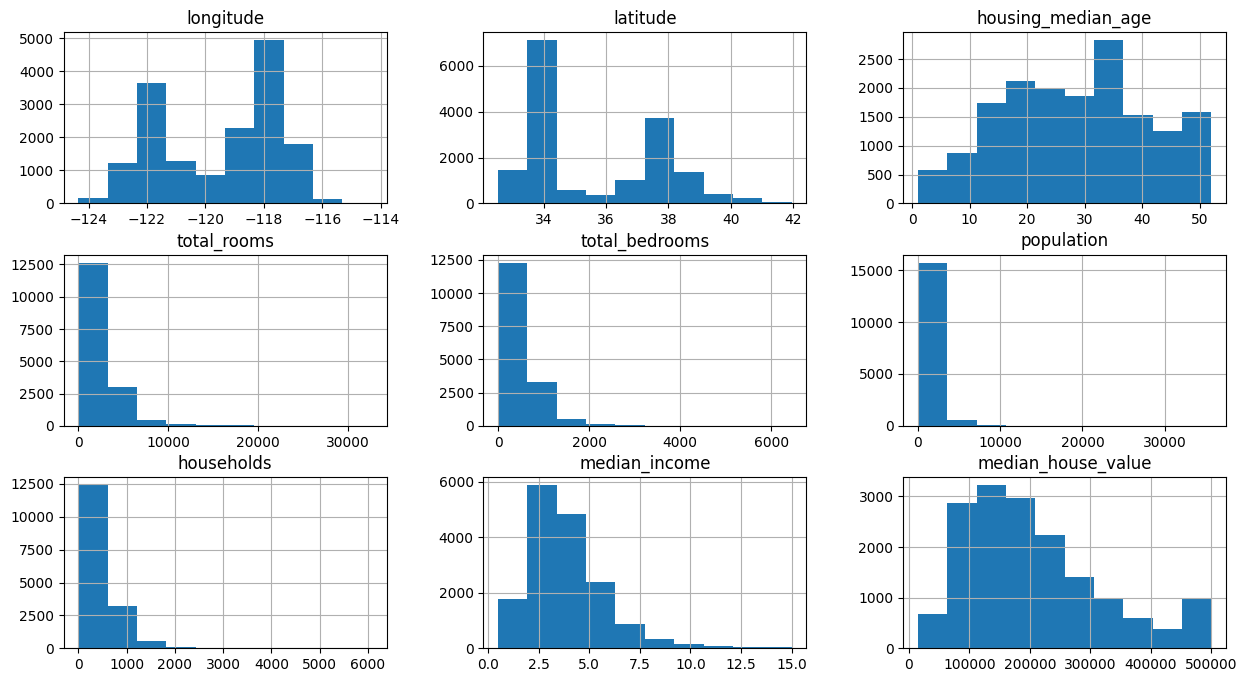

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923451,-0.105728,0.051753,0.075101,0.104320,0.060898,-0.015561,-0.043974
latitude,-0.923451,1.000000,0.007767,-0.042029,-0.070608,-0.113195,-0.075290,-0.079754,-0.146624
housing_median_age,-0.105728,0.007767,1.000000,-0.361695,-0.323868,-0.294335,-0.305622,-0.119773,0.108478
total_rooms,0.051753,-0.042029,-0.361695,1.000000,0.932807,0.860928,0.921131,0.200562,0.131170
total_bedrooms,0.075101,-0.070608,-0.323868,0.932807,1.000000,0.879779,0.978799,-0.002043,0.047559
population,0.104320,-0.113195,-0.294335,0.860928,0.879779,1.000000,0.910485,0.009901,-0.023012
households,0.060898,-0.075290,-0.305622,0.921131,0.978799,0.910485,1.000000,0.019924,0.064356
median_income,-0.015561,-0.079754,-0.119773,0.200562,-0.002043,0.009901,0.019924,1.000000,0.686971
median_house_value,-0.043974,-0.146624,0.108478,0.131170,0.047559,-0.023012,0.064356,0.686971,1.000000


correlation matrix (take a look at the same features - cor = 1)

<Axes: >

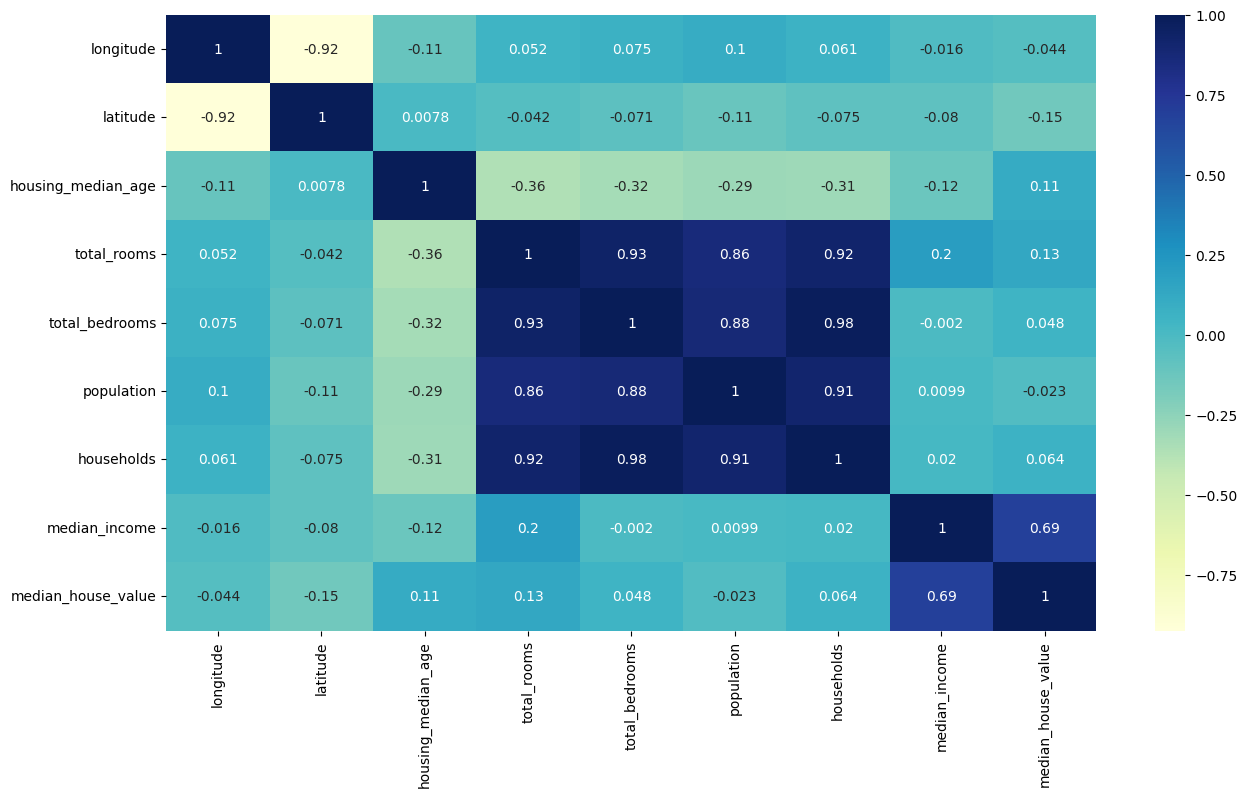

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

take a look at the quite strong correlation between median_house_value and median_income

# Data preprocessing

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

we are using natural logarithm

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

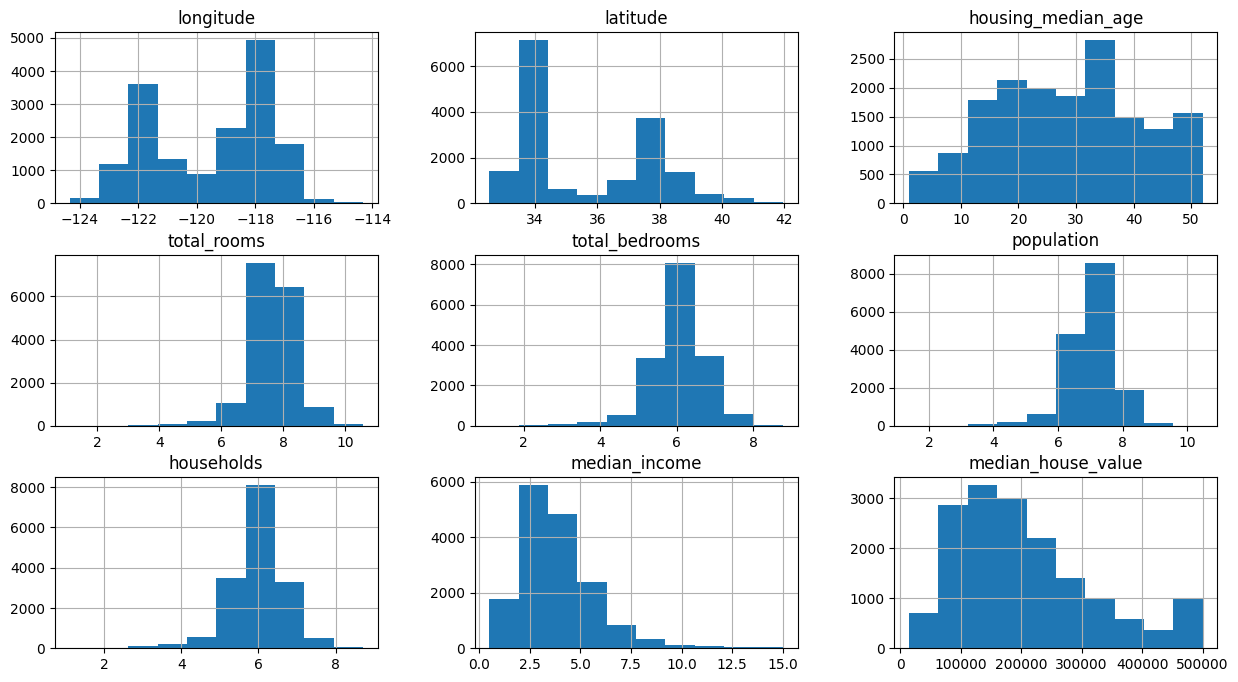

In [ ]:
train_data.hist(figsize=(15, 8))

# preprocess 'ocean_proximity'

In [124]:
train_data['ocean_proximity'].value_counts()

<1H OCEAN     7208
INLAND        5204
NEAR OCEAN    2099
NEAR BAY      1832
ISLAND           3
Name: ocean_proximity, dtype: int64

we can asign value 0 - false and 1- true

In [ ]:
train_data['ocean_proximity'].head()

9660        INLAND
19974       INLAND
1         NEAR BAY
11044    <1H OCEAN
15664     NEAR BAY
Name: ocean_proximity, dtype: object

In [ ]:
pd.get_dummies(train_data['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9660,0,1,0,0,0
19974,0,1,0,0,0
1,0,0,0,1,0
11044,1,0,0,0,0
15664,0,0,0,1,0
...,...,...,...,...,...
13964,0,1,0,0,0
6986,1,0,0,0,0
15875,0,0,0,1,0
17489,0,0,0,0,1


join new data

In [125]:
train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17173,-122.29,37.41,30.0,6373.0,854.0,2149.0,798.0,10.6868,500001.0,0,0,0,0,1
9222,-120.43,36.99,16.0,1027.0,199.0,673.0,193.0,2.9688,63800.0,0,1,0,0,0
1757,-122.33,37.95,42.0,1627.0,336.0,848.0,316.0,3.7708,144600.0,0,0,0,1,0
11988,-117.51,34.00,36.0,3791.0,746.0,2258.0,672.0,3.2067,124700.0,0,1,0,0,0
8513,-118.31,33.89,35.0,2144.0,423.0,1192.0,417.0,4.1458,231500.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8832,-118.37,34.09,33.0,3180.0,865.0,1347.0,841.0,4.0651,500001.0,1,0,0,0,0
2016,-119.81,36.71,25.0,1026.0,221.0,789.0,183.0,1.5625,52800.0,0,1,0,0,0
9618,-120.46,37.29,30.0,2972.0,635.0,1940.0,590.0,2.3594,72300.0,0,1,0,0,0
1540,-122.03,37.86,29.0,3025.0,477.0,1035.0,452.0,6.1120,390600.0,0,0,0,1,0


In [126]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

save data and check corr

<Axes: >

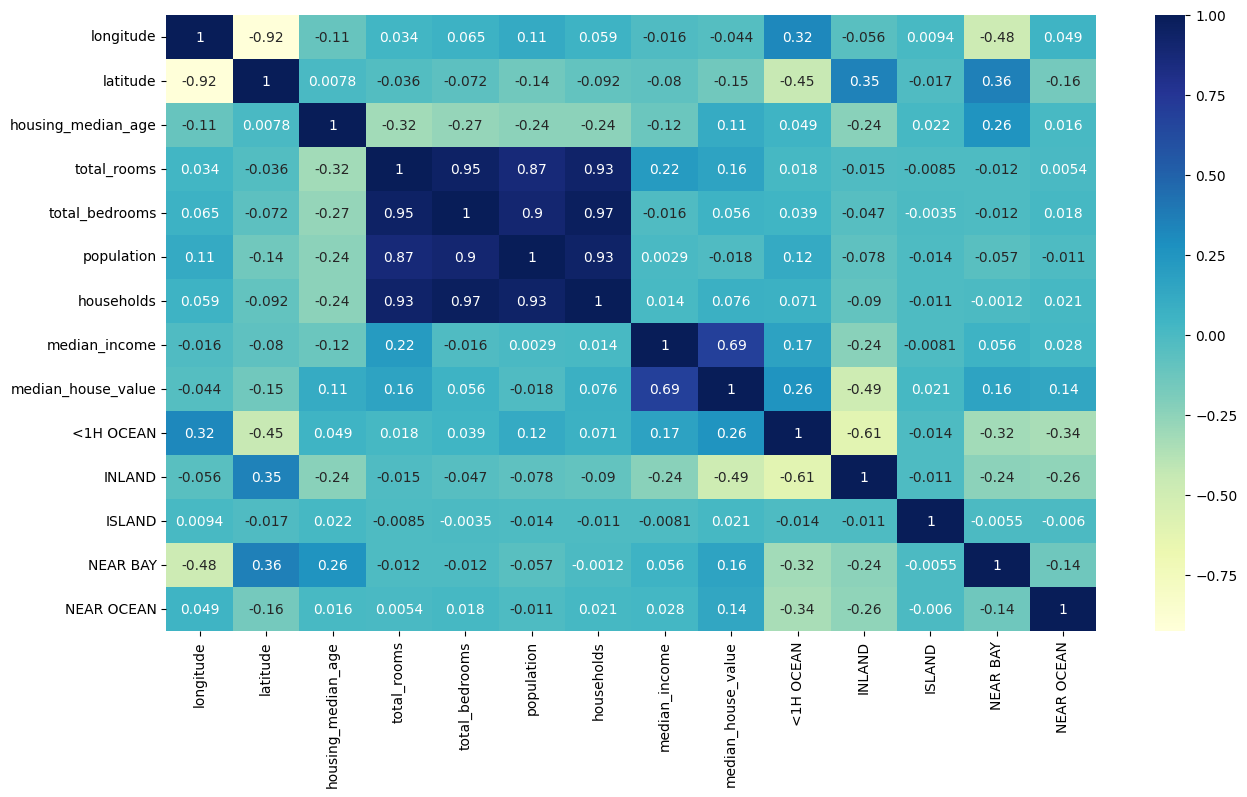

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

median_house_value correlate negatively with inland (check median_house_value and new values)

<Axes: xlabel='latitude', ylabel='longitude'>

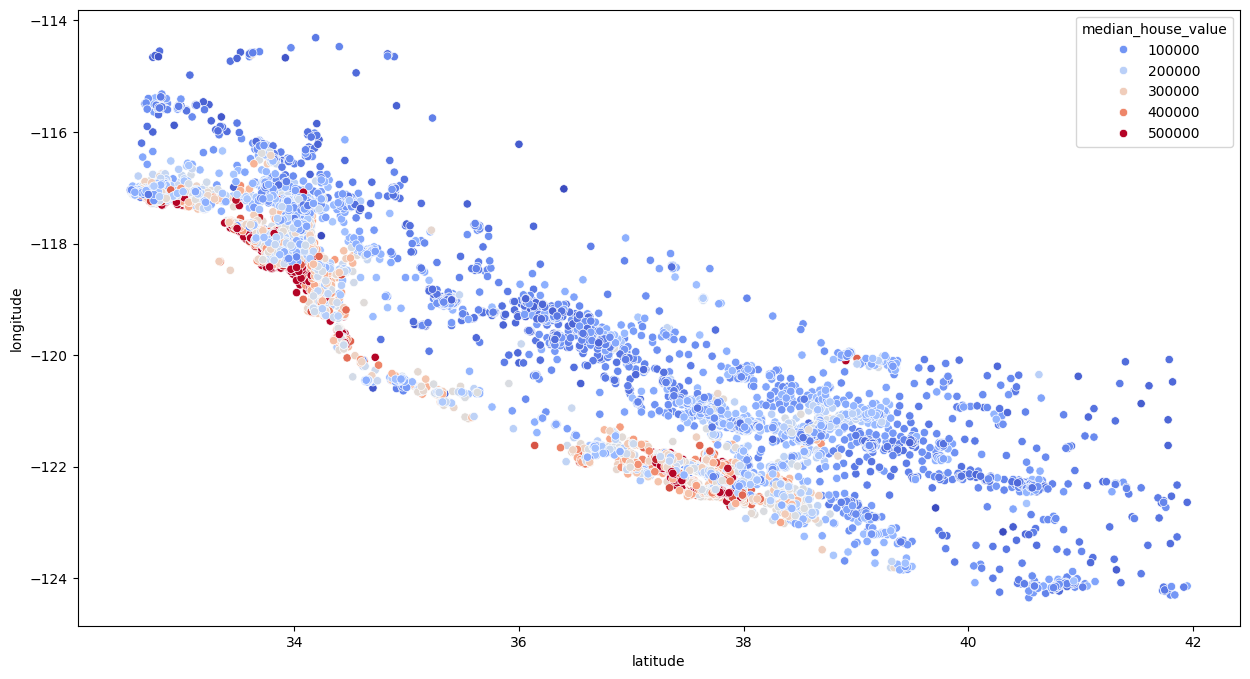

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

next to the coast we have higher prices

new features

In [127]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

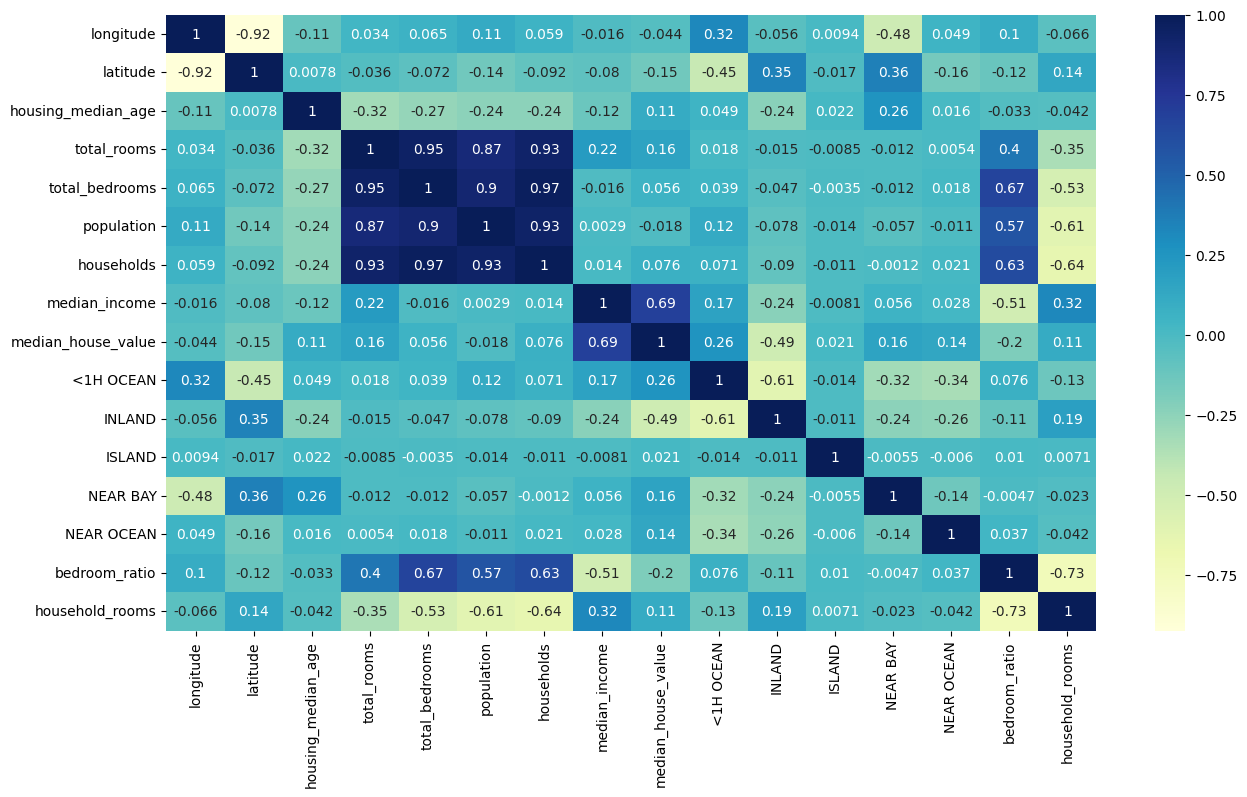

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

# Linear regression model

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
train_data = X_train.join(y_train)

train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

In [15]:
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

In [16]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
19404,-120.98,37.71,22.0,6.075346,4.499810,5.278115,4.465908,2.4211,0,1,0,0,0,0.740667,1.360383
12998,-121.25,38.68,13.0,6.222576,4.262680,5.590987,4.356709,6.1943,0,1,0,0,0,0.685035,1.428275
11125,-117.91,33.84,35.0,7.126891,5.783825,7.380256,5.777652,2.9583,1,0,0,0,0,0.811550,1.233527
15256,-117.26,33.04,16.0,8.042378,6.111467,7.268223,6.118097,6.6319,0,0,0,0,1,0.759908,1.314523
1100,-121.75,39.88,16.0,7.961370,6.327937,7.093405,6.109248,2.7143,0,1,0,0,0,0.794830,1.303167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6505,-118.06,34.08,34.0,7.088409,5.564520,6.849066,5.505332,3.4202,1,0,0,0,0,0.785017,1.287553
7589,-118.23,33.90,45.0,7.159292,5.476464,6.734592,5.356586,3.4107,1,0,0,0,0,0.764945,1.336540
20228,-119.29,34.28,38.0,7.778211,6.618739,7.338238,6.609349,2.3147,0,0,0,0,1,0.850933,1.176850
6882,-118.09,34.06,30.0,7.591357,6.315358,7.725330,6.238325,2.6094,1,0,0,0,0,0.831914,1.216890


In [17]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [18]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)


test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [19]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4546,-118.20,34.02,26.0,36.0,9.0,35.0,9.0,1.6250,<1H OCEAN
19542,-120.92,37.63,39.0,45.0,8.0,22.0,9.0,1.7679,INLAND
10296,-117.87,33.92,14.0,4039.0,669.0,1905.0,670.0,6.3303,<1H OCEAN
9588,-120.48,37.34,8.0,6146.0,1017.0,2821.0,987.0,4.6700,INLAND
2657,-124.08,40.06,17.0,1319.0,267.0,393.0,163.0,2.6250,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
408,-122.28,37.90,52.0,2318.0,328.0,779.0,312.0,7.1754,NEAR BAY
20154,-119.19,34.46,39.0,2056.0,381.0,939.0,371.0,6.6257,<1H OCEAN
12508,-121.45,38.57,52.0,3994.0,635.0,1295.0,625.0,5.1169,INLAND
4225,-118.29,34.11,40.0,2681.0,737.0,1144.0,669.0,3.0461,<1H OCEAN


In [20]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']
reg.score(X_test, y_test)

0.6782268178511599

# Scaler

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

reg.fit(X_train_s, y_train)

LinearRegression()

In [23]:
reg.score(X_test_s, y_test)

0.6782268178511599

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
forest = RandomForestRegressor()
forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [26]:
forest.score(X_test_s, y_test)

0.818333505793043

make it better

In [27]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [3,10,30],
    'max_features': [2,4,5,8]
}

grid_search = GridSearchCV(forest, param_grid,
                           cv=5,scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 5, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [28]:
best_forest = grid_search.best_estimator_

In [29]:
best_forest.score(X_test, y_test)

0.8135371460260503